## K-means Clustering to image compression 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [11]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k]  
        centroids[k] = np.mean(points, axis = 0)
    
    return centroids

In [8]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

In [9]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [4]:
original_img = plt.imread('bird_small.jpg')

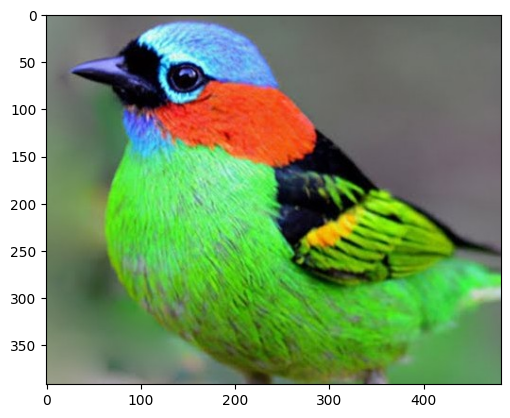

In [5]:
plt.imshow(original_img)

In [6]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (392, 482, 3)


In [7]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [12]:
K = 16
max_iters = 10
initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [14]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (188944,)
Closest centroid for the first five elements: [11 11 11 11 11]


In [15]:
def plot_kMeans_RGB(X_img, centroids, idx, K):
    """
    X_img:    array de forma (N, 3) con los valores R,G,B de cada píxel
    centroids: array de forma (K, 3) con los centroides de color
    idx:      array de forma (N,) o (N,1) con el índice de cluster de cada píxel (0..K-1)
    K:        número de clusters
    """
    idx = np.squeeze(idx)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # pintar los puntos por cluster
    for k in range(K):
        cluster_points = X_img[idx == k]
        ax.scatter(
            cluster_points[:, 0],  # R
            cluster_points[:, 1],  # G
            cluster_points[:, 2],  # B
            s=1,
            alpha=0.3
        )

    # pintar los centroides en rojo con cruces grandes
    ax.scatter(
        centroids[:, 0],
        centroids[:, 1],
        centroids[:, 2],
        c='red',
        marker='x',
        s=200,
        linewidths=3
    )

    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    ax.set_title("Original colors and their color clusters' centroids")

    plt.show()

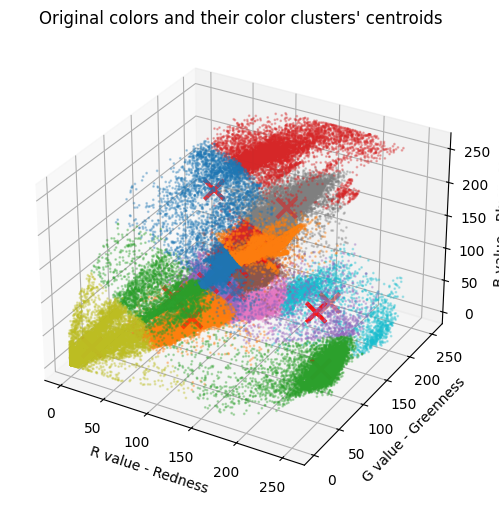

In [16]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

In [35]:
def show_centroid_colors(centroids):
    """
    centroids: arreglo (K, 3) con valores RGB en el rango 0–255
    """

    K = centroids.shape[0]

    # Normalizar a rango 0–1 para matplotlib
    colors = centroids / 255.0

    # Crear una imagen de 1xK píxeles y escalarla
    img = np.reshape(colors, (1, K, 3))
    img = np.repeat(img, 1, axis=0)   # altura de la franja

    # Plot
    plt.figure(figsize=(5, 2))
    plt.imshow(img)
    plt.axis("off")

    # Agregar índices de color debajo
    for i in range(K):
        plt.text(
            x=i, y=1, s=str(i),
            ha='center', va='top',
            fontsize=10
        )

    plt.title(f"Centroid colors ({K})")
    plt.show()

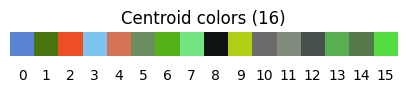

In [36]:
show_centroid_colors(centroids)